In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
# Load the data
df = pd.read_csv('randomdata.csv')

In [13]:
# Q1: Identify missing or incorrect data and preprocess
print("Q1: Data Preprocessing")
print("Shape before cleaning:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nIncorrect data:")
print(df[df['body_mass_g'] > 10000])  # Unreasonably high body mass

# Clean the data
df = df.dropna()  # Remove rows with missing values
df = df[df['body_mass_g'] <= 10000]  # Remove rows with unreasonably high body mass
print("\nShape after cleaning:", df.shape)
print("EXPLANATION:\n")
print("Used pandas to load the CSV file.")
print("Checked for missing values using df.isnull().sum().")
print("Identified incorrect data by looking for unreasonably high body mass.")
print("Removed rows with missing values using df.dropna().")
print("Removed rows with unreasonably high body mass using boolean indexing.")

Q1: Data Preprocessing
Shape before cleaning: (344, 7)

Missing values:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

Incorrect data:
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
73   Adelie  Torgersen            45.8           18.9              197.0   
206  Gentoo     Biscoe            46.5           14.4              217.0   

     body_mass_g     sex  
73       15000.0    male  
206      12000.0  female  

Shape after cleaning: (321, 7)
EXPLANATION:

Used pandas to load the CSV file.
Checked for missing values using df.isnull().sum().
Identified incorrect data by looking for unreasonably high body mass.
Removed rows with missing values using df.dropna().
Removed rows with unreasonably high body mass using boolean indexing.


In [14]:
# Q2: Average body mass for Gentoo penguins
print("\nQ2: Average body mass for Gentoo penguins")
gentoo_avg_mass = df[df['species'] == 'Gentoo']['body_mass_g'].mean()
print(f"Average body mass of Gentoo penguins: {gentoo_avg_mass:.2f} g")


Q2: Average body mass for Gentoo penguins
Average body mass of Gentoo penguins: 5097.52 g


In [15]:
# Q3: Distributions of bill length and depth
print("\nQ3: Distributions of bill length and depth")
species = df['species'].unique()
for feature in ['bill_length_mm', 'bill_depth_mm']:
    print(f"\nFeature: {feature}")
    for s in species:
        data = df[df['species'] == s][feature]
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)
        print(f"{s} - Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}")
        
print("EXPLANATION:\n")
print(" Iterate through each species and feature ('bill_length_mm' and 'bill_depth_mm'")
print("Calculate skewness and kurtosis using scipy.stats.")


Q3: Distributions of bill length and depth

Feature: bill_length_mm
Adelie - Skewness: 0.07, Kurtosis: -0.25
Gentoo - Skewness: 0.63, Kurtosis: 1.13
Chinstrap - Skewness: -0.09, Kurtosis: -0.03

Feature: bill_depth_mm
Adelie - Skewness: 0.31, Kurtosis: -0.10
Gentoo - Skewness: 0.31, Kurtosis: -0.60
Chinstrap - Skewness: 0.00, Kurtosis: -0.90
EXPLANATION:

 Iterate through each species and feature ('bill_length_mm' and 'bill_depth_mm'
Calculate skewness and kurtosis using scipy.stats.



Q4: Outlier Detection

Outliers in bill_length_mm:
Empty DataFrame
Columns: [species, bill_length_mm]
Index: []

Outliers in bill_depth_mm:
Empty DataFrame
Columns: [species, bill_depth_mm]
Index: []

Outliers in flipper_length_mm:
Empty DataFrame
Columns: [species, flipper_length_mm]
Index: []

Outliers in body_mass_g:
       species  body_mass_g
324  Chinstrap      10000.0


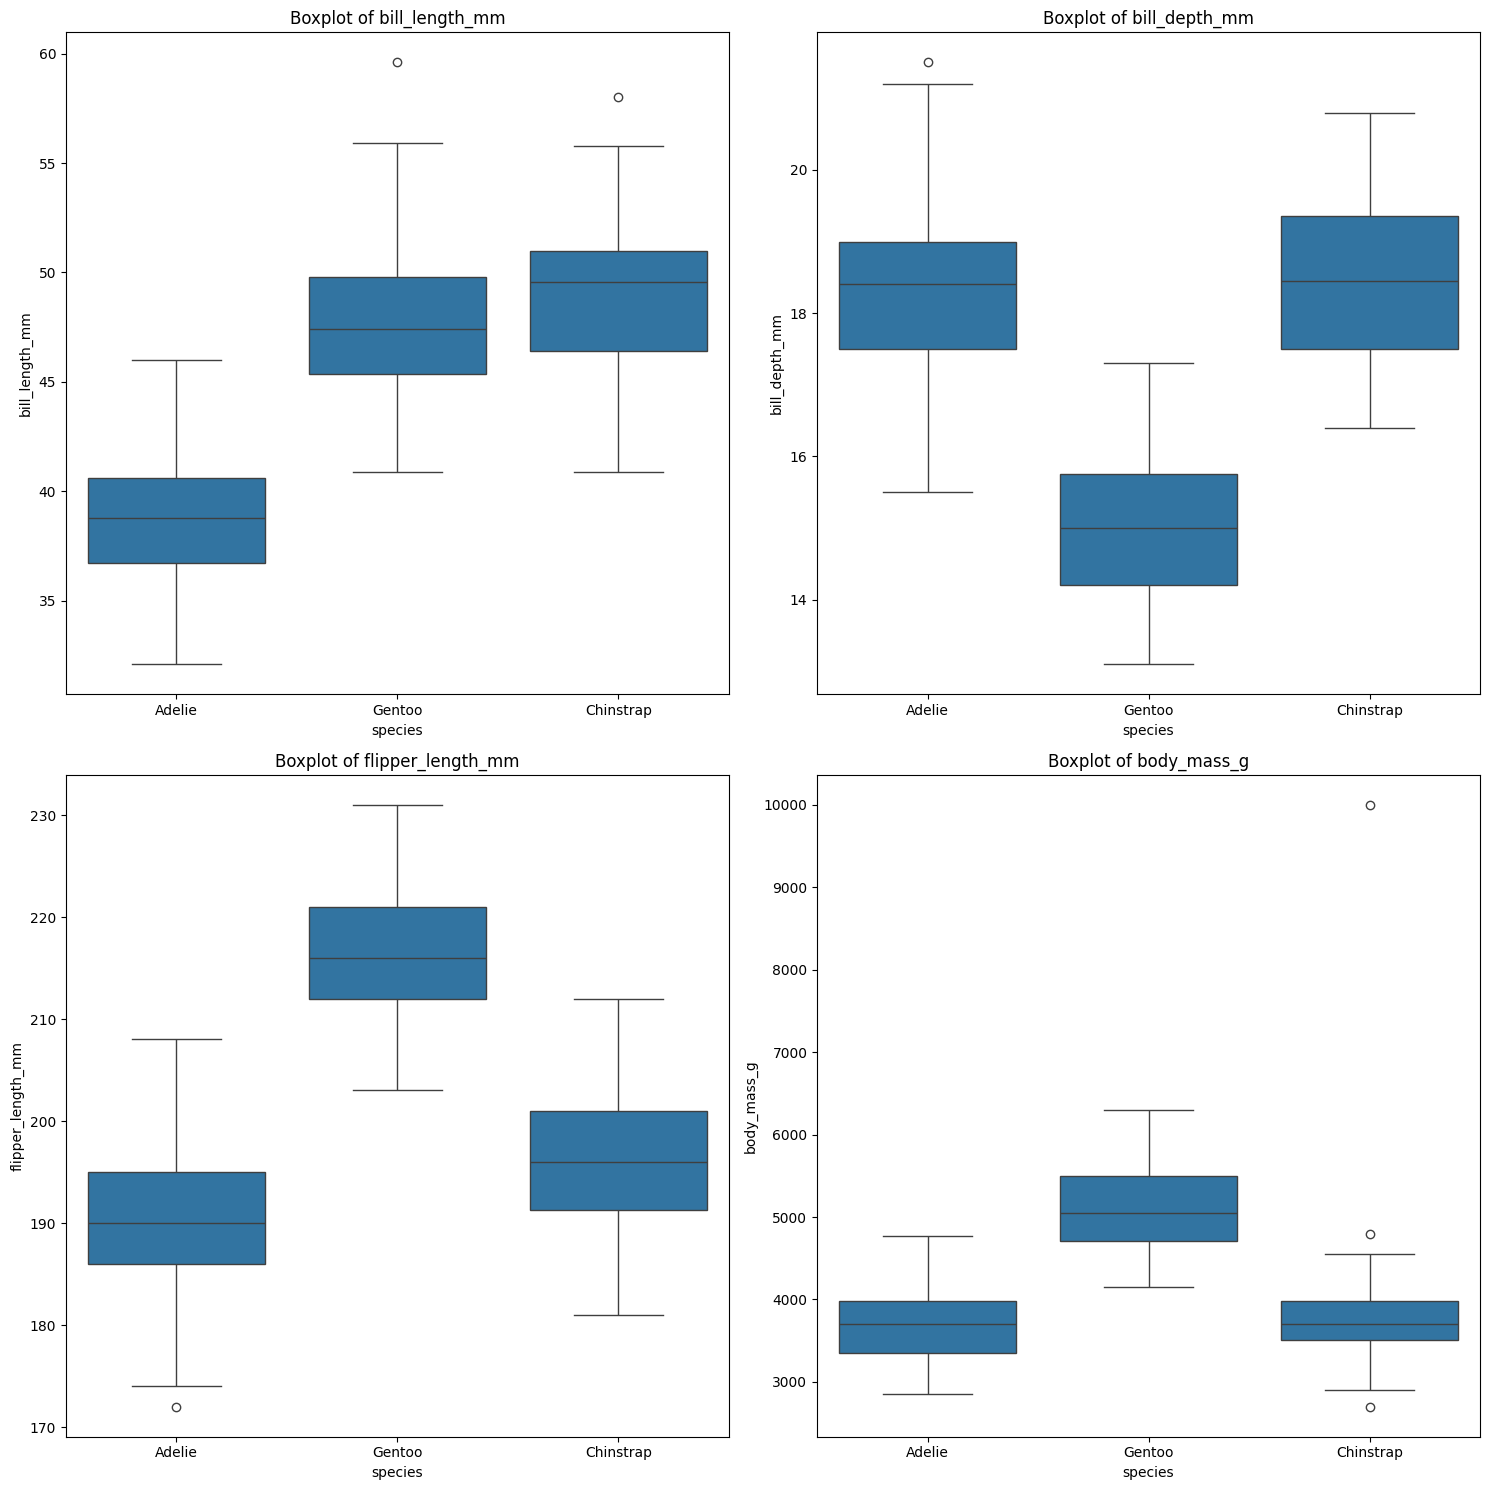

In [16]:
# Q4: Identify and visualize outliers
print("\nQ4: Outlier Detection")
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for i, feature in enumerate(features):
    z_scores = np.abs(stats.zscore(df[feature]))
    outliers = df[z_scores > 3]
    
    print(f"\nOutliers in {feature}:")
    print(outliers[['species', feature]])
    
    sns.boxplot(x='species', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [17]:
# Q5: PCA Analysis
print("\nQ5: PCA Analysis")
features_for_pca = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features_for_pca]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance ratio:", np.cumsum(pca.explained_variance_ratio_))
print("EXPLANATION:\n")
print("Calculate z-scores for each numeric feature.")
print("Identify outliers as data points with absolute z-scores > 3.")
print("Visualize outliers using box plots.")



Q5: PCA Analysis
Explained variance ratio: [0.66654166 0.19569018 0.09582292 0.04194525]
Cumulative explained variance ratio: [0.66654166 0.86223183 0.95805475 1.        ]
EXPLANATION:

Calculate z-scores for each numeric feature.
Identify outliers as data points with absolute z-scores > 3.
Visualize outliers using box plots.



Q6: Visualizing bill_length_mm vs bill_depth_mm


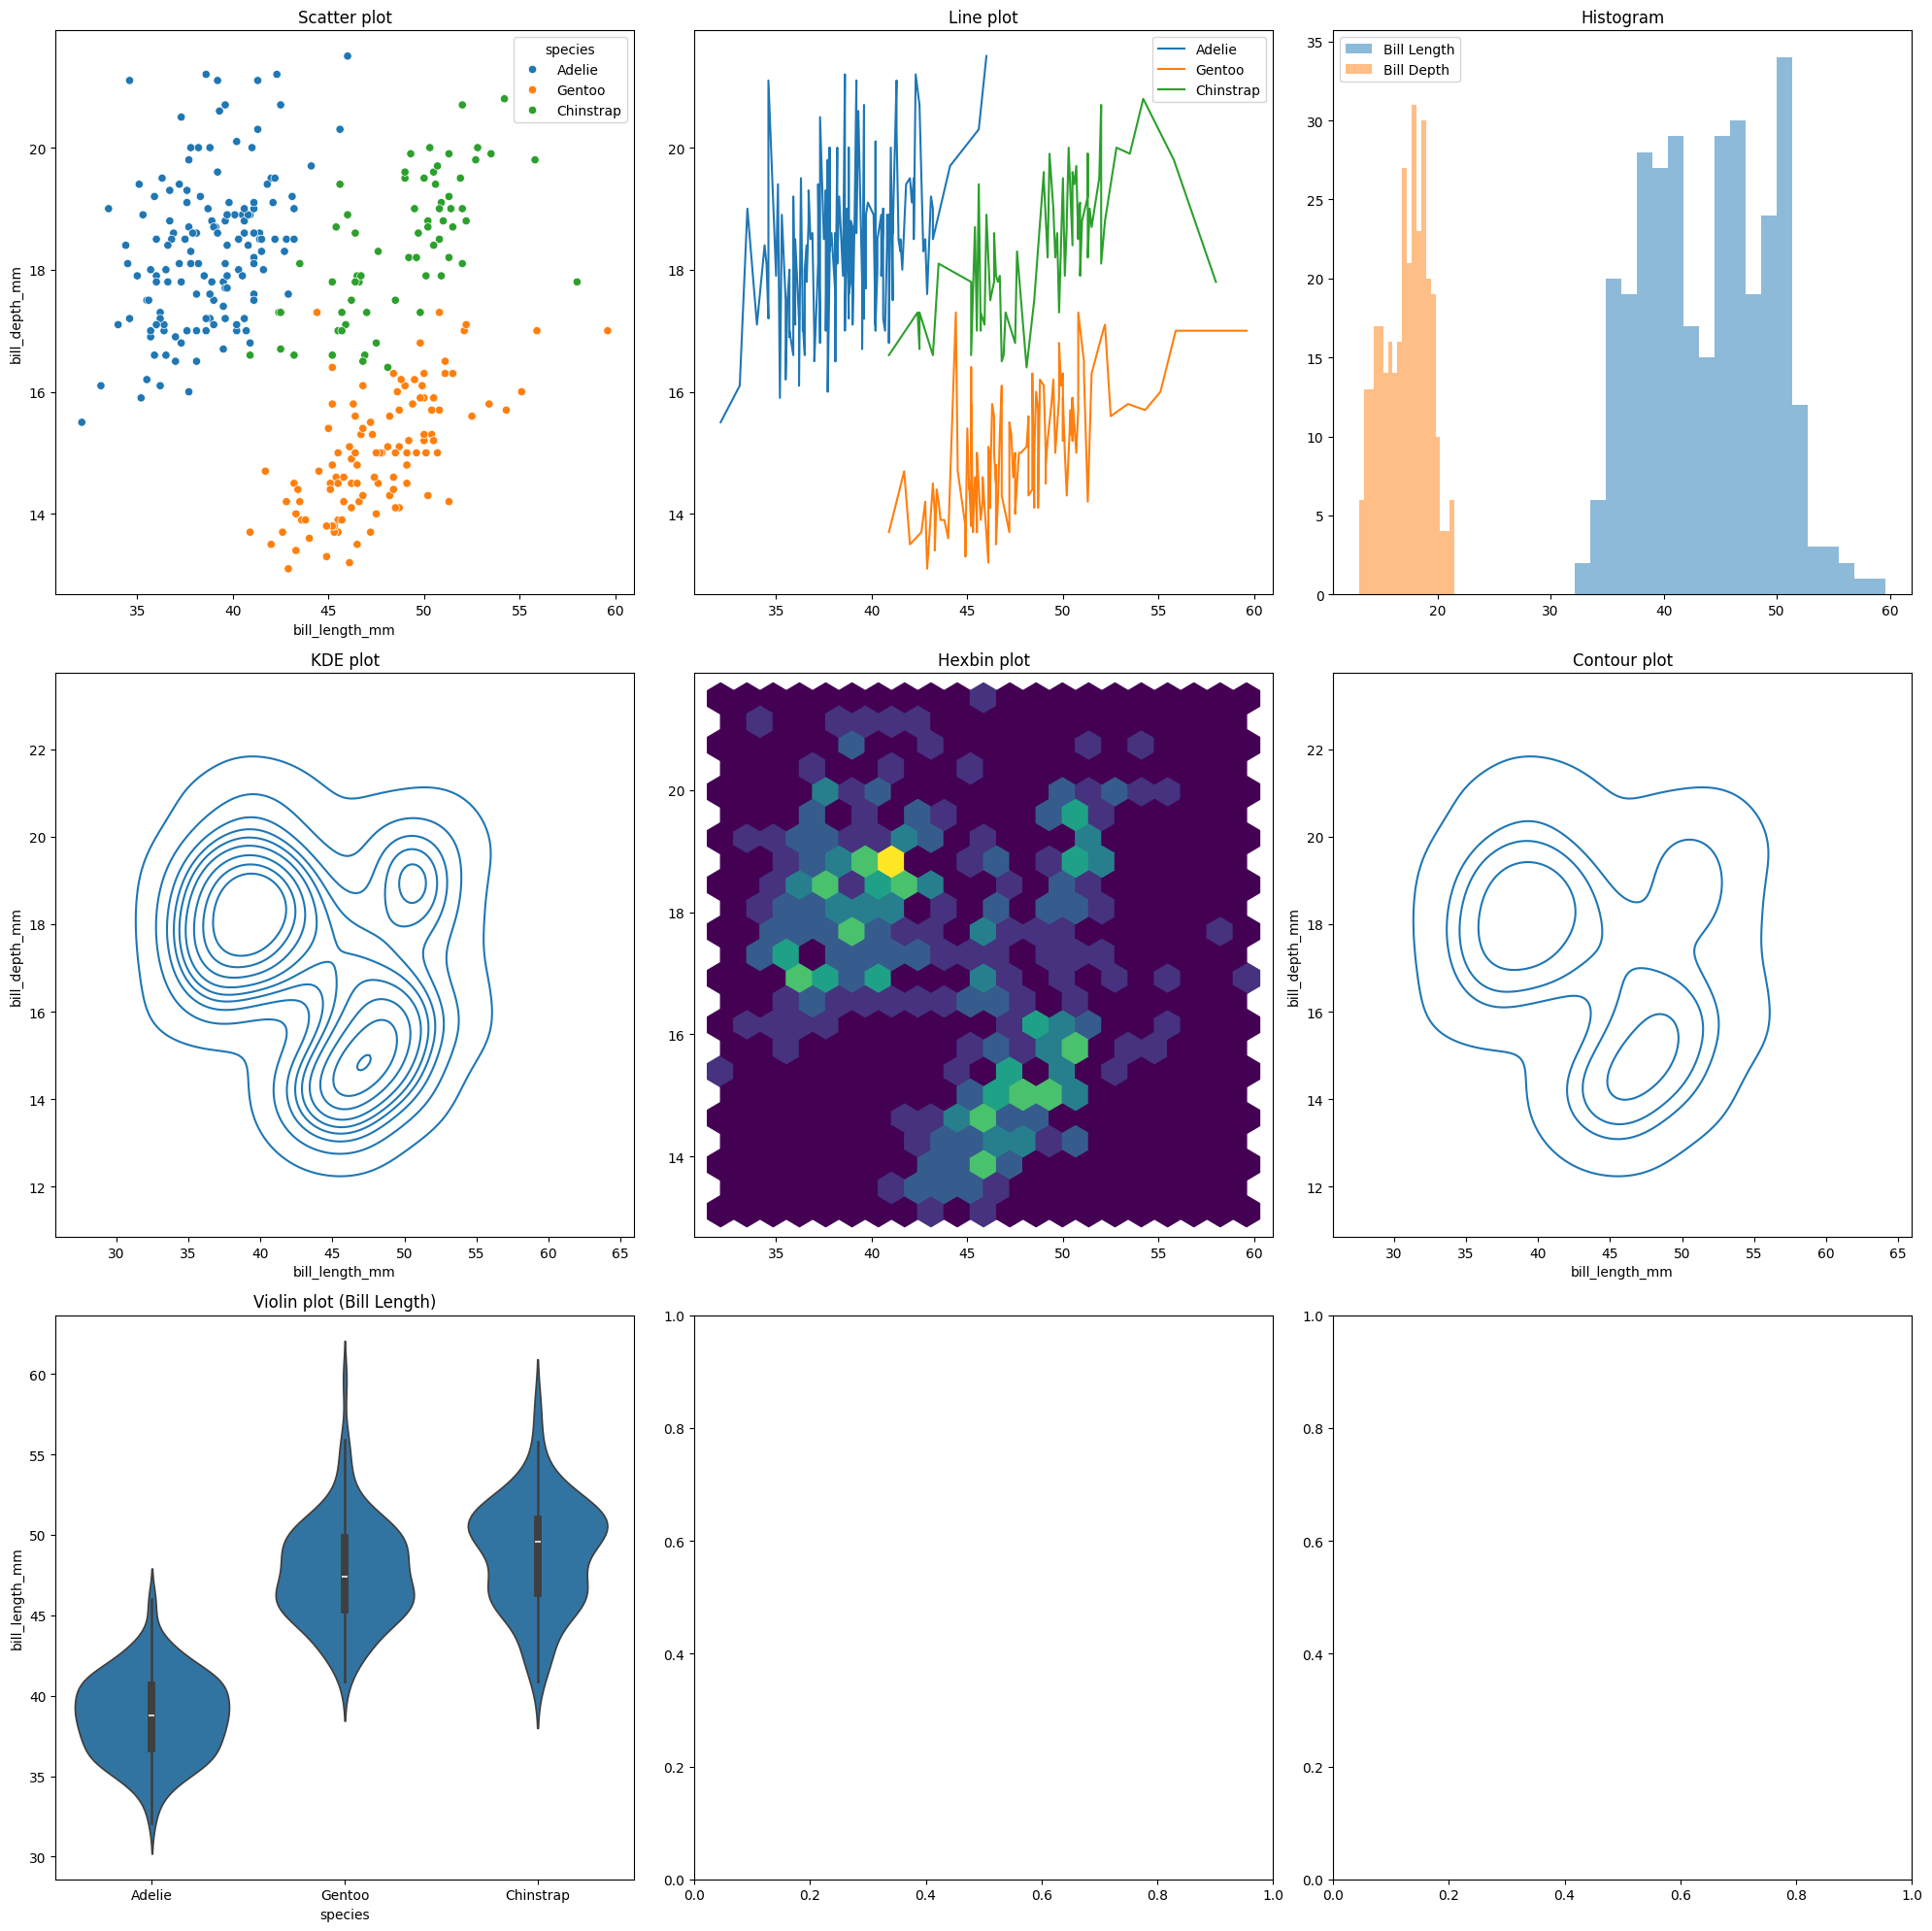

In [18]:
# Q6: Visualize bill_length_mm vs bill_depth_mm
print("\nQ6: Visualizing bill_length_mm vs bill_depth_mm")
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.ravel()

# Scatter plot
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=axes[0])
axes[0].set_title('Scatter plot')

# Line plot
for species in df['species'].unique():
    species_data = df[df['species'] == species].sort_values('bill_length_mm')
    axes[1].plot(species_data['bill_length_mm'], species_data['bill_depth_mm'], label=species)
axes[1].set_title('Line plot')
axes[1].legend()

# Histogram
axes[2].hist(df['bill_length_mm'], bins=20, alpha=0.5, label='Bill Length')
axes[2].hist(df['bill_depth_mm'], bins=20, alpha=0.5, label='Bill Depth')
axes[2].set_title('Histogram')
axes[2].legend()

# Kernel Density Estimation (KDE) plot
sns.kdeplot(data=df, x='bill_length_mm', y='bill_depth_mm', ax=axes[3])
axes[3].set_title('KDE plot')

# Hexbin plot
axes[4].hexbin(df['bill_length_mm'], df['bill_depth_mm'], gridsize=20, cmap='viridis')
axes[4].set_title('Hexbin plot')

# Contour plot
sns.kdeplot(data=df, x='bill_length_mm', y='bill_depth_mm', levels=5, ax=axes[5])
axes[5].set_title('Contour plot')

# Violin plot
sns.violinplot(data=df, x='species', y='bill_length_mm', ax=axes[6])
axes[6].set_title('Violin plot (Bill Length)')

plt.tight_layout()
plt.show()

In [19]:
# Q7: Maximum flipper length for each combination of species and island
print("\nQ7: Maximum flipper length for each combination of species and island")
max_flipper = df.groupby(['species', 'island'])['flipper_length_mm'].max().unstack()
print(max_flipper)

print("\nSpecies with the longest flippers on each island:")
for island in df['island'].unique():
    species_max = max_flipper[island].idxmax()
    print(f"{island}: {species_max}")


Q7: Maximum flipper length for each combination of species and island
island     Biscoe  Dream  Torgersen
species                            
Adelie      203.0  208.0      202.0
Chinstrap     NaN  212.0        NaN
Gentoo      231.0    NaN        NaN

Species with the longest flippers on each island:
Torgersen: Adelie
Biscoe: Gentoo
Dream: Chinstrap


In [20]:
# Q8: Z-score normalization
print("\nQ8: Z-score normalization")
features_to_normalize = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

print("First few rows of normalized data:")
print(df_normalized[features_to_normalize].head())


Q8: Z-score normalization
First few rows of normalized data:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.868327       0.767560          -1.411604    -0.537184
1       -0.795707       0.103169          -1.052380    -0.479164
2       -0.650467       0.409811          -0.405777    -1.117387
4       -1.304046       1.074202          -0.549467    -0.885306
5       -0.832017       1.738593          -0.765001    -0.653225
